<font size ="+2"> 1 Introducción </font>

El siguiente ejemplo ilustra el comportamiento de un filtro de pase alto (High pass filter) que hace referencia a atenuar los componentes con una "frecuencia" baja, mientras que los componentes de alta frecuencia no se ven afectados.

(Esto es en el caso que trabajemos con un espectro de frecuencias, con respecto al trabajo con imágenes el filtro es aplicado a los píxeles de la imagen respectiva)

Con respecto a la imagen, su implementación es similar a pasar una imagen a escala de grises, pero solamente modificando aquellos píxeles que no superen cierto umbral. 



<font size ="+2"> 2 Armado del ambiente </font>

Toma la dirección web de una imagen con acceso público en internet, la deja disponible al contexto de ejecución del cuaderno colab.

In [ ]:
#@title # 2.1 Parametros de ejecución
#@markdown ---
#@markdown ### Especifique la URL de la imagen:
url_imagen =  "https://github.com/SistemasOperativosAvanz/hpc-tp-3/blob/main/sampleImageGrayscale.jpg?raw=true" #@param {type:"string"}

#@markdown ---
#!wget https://resizer.glanacion.com/resizer/Wt7c9G_TCewfo1JU_YQh38ygBRY=/768x0/filters:quality(80)/cloudfront-us-east-1.images.arcpublishing.com/lanacionar/BPZX5263MZDBFNHZDVZ5BLP73Y.jpg -O imagen.jpg

!wget {url_imagen} -O imagen.jpg

--2021-11-23 23:07:02--  https://github.com/SistemasOperativosAvanz/hpc-tp-3/blob/main/sampleImageGrayscale.jpg?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/SistemasOperativosAvanz/hpc-tp-3/raw/main/sampleImageGrayscale.jpg [following]
--2021-11-23 23:07:02--  https://github.com/SistemasOperativosAvanz/hpc-tp-3/raw/main/sampleImageGrayscale.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/SistemasOperativosAvanz/hpc-tp-3/main/sampleImageGrayscale.jpg [following]
--2021-11-23 23:07:02--  https://raw.githubusercontent.com/SistemasOperativosAvanz/hpc-tp-3/main/sampleImageGrayscale.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubuserco

<font size="+2"> 3 - Desarrollo CPU </font>

Código que resuelve el ejercicio desde el punto de vista secuencial. Partimos de la base de una imagen en escala de grises, que luego de aplicar el filtro, los píxeles que no sobrepasan el umbral son atenuados (de ahí deriva su nombre, solo "pasan" osea que no se modifican, los píxeles que sobrepasan cierto umbral predefinido).

Utilizamos la siguiente matriz:


              [-1, -1, -1]
              [-1,  9, -1]
              [-1, -1, -1]

Al estar parados en un píxel, obtenemos todos sus píxeles adyacentes (formando una matriz 3x3) y la multiplicamos con la matriz que se muestra arriba. Luego realizamos la sumatoria de la matriz resultante de esa multiplicación.

Por último, verificamos si esa sumatoria sobrepasa un umbral. Si lo sobrepasa se asigna la sumatoria, de lo contrario, se procede a atenuar dicho píxel, logrando el efecto de filtro de paso alto (High Pass Filter).

Imagen del filtro: imagen.jpg -RGB- [1076, 720]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Tiempo de ejecución CPU:  78822.619 [ms]
Tiempo Total:  78903.025 [ms]


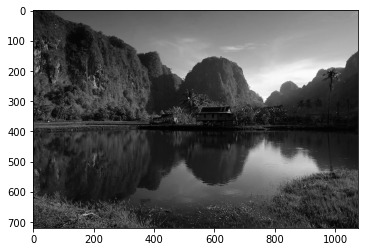

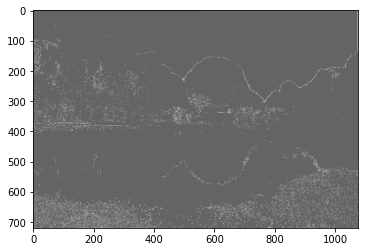

In [ ]:
from datetime import datetime

tiempo_total_cpu = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

img_nombre = 'imagen.jpg'
image = Image.open(img_nombre)

# Obtengo las dimensiones de la imagen
img_ancho, img_alto = image.size

# Convierto la imagen comprimida en JPEG/PNG a array.
img_O_cpu = numpy.asarray(image)
img_O_cpu = img_O_cpu.astype( numpy.int32() )

# Genero el array resultado (3 pixeles usa RGB * (el tamaño del array)).
img_R_cpu = numpy.empty_like( img_O_cpu)

# Muestro los atributos de la imagen y como se ve antes del seudo filtro.
print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

plt.figure()
imgplot=plt.imshow( img_O_cpu )

tiempo_img_cpu = datetime.now()
 
matHPF = [[-1, -1, -1], [-1,9,-1], [-1,-1,-1]]
umbral = 400

for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):

    matAuxRojo = [[0, 0, 0], [0,0,0], [0,0,0]]
    matAuxVerde = [[0, 0, 0], [0,0,0], [0,0,0]]
    matAuxAzul = [[0, 0, 0], [0,0,0], [0,0,0]]

    sumaRojo = 0
    sumaVerde = 0
    sumaAzul = 0

    i = 0
    j = 0
    auxI = 0
    auxJ = 0

    if y - 1 >= 0 and x - 1 >= 0:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y-1)][(x-1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1
    
    if y - 1 >= 0:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y-1)][x]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1

    if y - 1 >= 0 and x + 1 < img_ancho:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y-1)][(x+1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ = 0
    auxI += 1

    if x - 1 >= 0:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[y][(x-1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1

    pixelRojo, pixelVerde, pixelAzul = img_O_cpu[y][x]
    matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
    matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
    matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1

    if x + 1 < img_ancho:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[y][(x+1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ = 0
    auxI += 1

    if y + 1 < img_alto and x - 1 >= 0:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y+1)][(x-1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1

    if y + 1 < img_alto:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y+1)][x]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ += 1

    if y + 1 < img_alto and x + 1 < img_ancho:
      pixelRojo, pixelVerde, pixelAzul = img_O_cpu[(y+1)][(x+1)]
      matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * pixelRojo
      matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * pixelVerde
      matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * pixelAzul
    auxJ = 0
    auxI += 1


    for i in range(0,3):
      for j in range(0,3):
        sumaRojo += matAuxRojo[i][j]
        sumaVerde += matAuxVerde[i][j]
        sumaAzul += matAuxAzul[i][j]



    pixelRojo, pixelVerde, pixelAzul = img_O_cpu[y][x]

    if sumaRojo > umbral:
        pixelRojo = sumaRojo
        img_R_cpu[y][x] = [sumaRojo, pixelVerde, pixelAzul]
    else:
        pixelRojo = 100
        img_R_cpu[y][x] = [pixelRojo, pixelVerde, pixelAzul]

    if sumaVerde > umbral:
        pixelVerde = sumaVerde
        img_R_cpu[y][x] = [pixelRojo, sumaVerde, pixelAzul]
    else:
        pixelVerde = 100
        img_R_cpu[y][x] = [pixelRojo, pixelVerde, pixelAzul]
      
    if sumaAzul > umbral:
        pixelAzul = sumaAzul
        img_R_cpu[y][x] = [pixelRojo, pixelVerde, sumaAzul]
    else:
        pixelAzul = 100
        img_R_cpu[y][x] = [pixelRojo, pixelVerde, pixelAzul]



tiempo_img_cpu = datetime.now() - tiempo_img_cpu

# Muestro la imagen luego de aplicarle el filtro.
plt.figure()
imgplot = plt.imshow( img_R_cpu )

tiempo_total_cpu = datetime.now() - tiempo_total_cpu

print( "Tiempo de ejecución CPU: ", tiempo_en_ms( tiempo_img_cpu   ), "[ms]" )
print( "Tiempo Total: ",            tiempo_en_ms( tiempo_total_cpu ), "[ms]" )




<font size = "+2"> 4.1 Instala en el cuaderno el módulo CUDA de Python. </font>

In [ ]:
!pip install pycuda

<font size="+2"> 4.2 - Desarrollo GPU </font>

Código que resuelve el ejercicio desde el punto de vista GPU. Partimos de la base de una imagen en escala de grises, que luego de aplicar el filtro, los píxeles que no sobrepasan el umbral son atenuados.

In [ ]:
%matplotlib inline
from datetime import datetime
tiempo_total = datetime.now()

import matplotlib.pyplot as plt
import numpy
from PIL import Image 
import pycuda.driver as cuda
import pycuda.autoinit
from pycuda.compiler import SourceModule

# --------------------------------------------
# Definición de función que transforma el tiempo en  milisegundos 
tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0
# --------------------------------------------

img_nombre = 'imagen.jpg'
image = Image.open( img_nombre ) 
  
# summarize some details about the image 
img_ancho, img_alto  = image.size 

# Convierto la imagen comprimida en JPEG/PNG a array
img_O_cpu = numpy.asarray(image)
img_O_cpu = img_O_cpu.astype( numpy.int32() )
img_R_cpu = numpy.empty_like( img_O_cpu)
# print("img_O_cpu: ", img_O_cpu)
# print("img_R_cpu: ", img_R_cpu)

try:

  # Reservo los 2 vectores en GPU(3 pixeles usa RGB * (el tamaño del array))
  img_O_gpu = cuda.mem_alloc( img_O_cpu.nbytes )
  img_R_gpu = cuda.mem_alloc( img_R_cpu.nbytes )

  # GPU - Copio la memoria al GPU.
  cuda.memcpy_htod( img_O_gpu, img_O_cpu )
  cuda.memcpy_htod( img_R_gpu, img_R_cpu )

# CPU - Defino la función kernel que ejecutará en GPU.
  module = SourceModule("""
__global__ void kernel_img( int ancho, int alto, int *img_O, int *img_R )
{
  // Calculo las coordenadas del Thread en dos dimensiones.
  int idx = threadIdx.x + blockIdx.x*blockDim.x;
  int idy = threadIdx.y + blockIdx.y*blockDim.y;

  int matHPF[3][3] = {{-1, -1, -1}, {-1, 9, -1}, {-1, -1, -1}};
  int umbral = 400;

  int matAuxRojo[3][3] = {{0,0,0}, {0,0,0}, {0,0,0}};
  int matAuxVerde[3][3] = {{0,0,0}, {0,0,0}, {0,0,0}};
  int matAuxAzul[3][3] = {{0,0,0}, {0,0,0}, {0,0,0}};

  int sumaRojo = 0;
  int sumaVerde = 0;
  int sumaAzul = 0;

  int i, j, auxI, auxJ;


  // Verifico que los Thread, esten dentro de las dimensiones de la imagen.
  if( idx < ancho && idy < alto )
  {

    auxI = 0;
    auxJ = 0;

    for(i = idx - 1; i <= idx + 1 && i < ancho; i++)
    {

        if(i < 0)
        {
          i++;
          auxI++;
        }
          

      for(j = idy - 1; j <= idy + 1 && j < alto; j++)
      {
        if(j < 0)
        {
          j++;
          auxJ++;
        }
        

        matAuxRojo[auxI][auxJ] = matHPF[auxI][auxJ] * img_O[(i + (j*ancho)) * 3];
        matAuxVerde[auxI][auxJ] = matHPF[auxI][auxJ] * img_O[((i +(j*ancho))*3)+1];
        matAuxAzul[auxI][auxJ] = matHPF[auxI][auxJ] * img_O[((i +(j*ancho))*3)+2];
        auxJ++;
      }
      auxI++;
      auxJ = 0;
    }

    for(i = 0; i < 3; i++)
    {
      for(j = 0; j < 3; j++)
      {
        sumaRojo += matAuxRojo[i][j];
        sumaVerde += matAuxVerde[i][j];
        sumaAzul += matAuxAzul[i][j];
      }
    }

    if(sumaRojo > umbral)
    img_R[(idx+(idy*ancho))*3  ] = sumaRojo;
    else
    img_R[(idx+(idy*ancho))*3  ] = 100;

    if(sumaVerde > umbral)
    img_R[(idx+(idy*ancho))*3+1] = sumaVerde;
    else
    img_R[(idx+(idy*ancho))*3+1] = 100;

    if(sumaAzul > umbral)
    img_R[(idx+(idy*ancho))*3+2] = sumaAzul;
    else
    img_R[(idx+(idy*ancho))*3+2] = 100;
  }
}
""") 

  # Muestro los atributos de la imagen y como se ve antes del seudo filtro.
  print("Imagen del filtro: " + img_nombre + " -" + image.mode + "- [" + str(img_ancho) + ", " + str(img_alto ) + "]" )  

  # CPU - Genero la función kernel.
  kernel = module.get_function("kernel_img")

  tiempo_img = datetime.now()

  dim_hilo_x = 16
  dim_bloque_x = numpy.int( (img_ancho+dim_hilo_x-1) / dim_hilo_x )

  dim_hilo_y = 19
  dim_bloque_y = numpy.int( (img_alto+dim_hilo_y-1) / dim_hilo_y )

  print( "Thread: [", dim_hilo_x, ",", dim_hilo_y, " ], Bloque : [", dim_bloque_x, ",", dim_bloque_y, "]" )
  print( "Total de Thread: [", dim_hilo_x*dim_bloque_x, ",", dim_hilo_y*dim_bloque_y, " ]", " = ", dim_hilo_x*dim_bloque_x*dim_hilo_y*dim_bloque_y )

  tiempo_img = datetime.now()

  kernel( numpy.int32(img_ancho), numpy.int32(img_alto), img_O_gpu, img_R_gpu, block=( dim_hilo_x, dim_hilo_y, 1 ), grid=(dim_bloque_x, dim_bloque_y,1) )

  tiempo_img = datetime.now() - tiempo_img

  # GPU - Copio el resultado desde la memoria GPU.
  cuda.memcpy_dtoh( img_R_cpu, img_R_gpu )

  # Muestro la imagen Original el filtro.
  plt.figure()
  imgplot=plt.imshow( img_O_cpu )

  # Muestro la imagen luego de aplicarle el filtro.
  plt.figure()
  imgplot=plt.imshow( img_R_cpu )

  tiempo_total = datetime.now() - tiempo_total

  # cuda.Context.synchronize();

  print("Tiempo TOTAL: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo GPU  : ", tiempo_en_ms( tiempo_img ), "[ms]" )

except Exception as e:
  print("Ha ocurrido un error.\n Recuerde que debe estar conectado a un entorno GPU y haber realizado la instalación del módulo de CUDA.\n ", e.args)






ModuleNotFoundError: ignored

<font size="+2"> 5. Métricas </font>

Para medir los tiempos promedios entre la ejecución del filtro de paso alto (High Pass Filter) realizaremos varios ensayos, en los que observamos lo siguiente:

<center>  <font size="+1"> CPU </font> </center> 

Numero de Ensayo | Tiempo CPU | Tiempo Total
---------|--------|----------------
1 | 77740.34 [ms] | 77864.776 [ms]
2 | 77975.273 [ms] | 78055.453 [ms]
3 | 78471.737 [ms] | 78560.096 [ms]
4 | 78107.906 [ms] | 78189.57 [ms]
5 | 78822.619 [ms] | 78903.025 [ms]

 .
<center>  <font size="+1"> GPU </font> </center> 

Numero de Ensayo | Tiempo GPU | Tiempo Total
---------|--------|----------------
1 | 0.191 [ms] | 102.246 [ms]
2 | 0.089 [ms] | 116.236 [ms]
3 | 0.098 [ms] | 102.357 [ms]
4 | 0.089 [ms] | 102.022 [ms]
5 | 0.109 [ms] | 106.616 [ms]


.

Luego de realizar varias pruebas, tanto en la ejecución del algoritmo de forma secuencial y el algoritmo de forma paralela (utilizando GPU) vemos cambios significativos en la performance del mismo. Por ejemplo, podemos ilustrar: 

Método de Ejecución | Numero de Ensayos | Tiempo Promedio (CPU/GPU) | Tiempo Promedio Total
-----------|---------|--------|-----------
CPU | 5 | 78223.575 [ms] | 78314.584 [ms]
GPU | 5 | 0.115 [ms] | 105.895 [ms]

<font size="+2"> 6. Conclusiones </font>

Al obtener varias muestras en la ejecución del algoritmo HPF secuencial y paralelamente (al utilizar GPU), podemos evidenciar el potencial que obtenemos utilizando GPU, brindándonos una performance más que notable. (Siendo el tiempo total más de 700 veces más rapido). 

Contamos con la necesidad de recalcar que el GPU responde a lo que el CPU le "ordena" (haciendo referencia al ejemplo en el que el CPU es el cerebro y el GPU la orquesta) y que de ninguna manera es un reemplazo para él, solo que es mucho más performante (y tiene otras capacidades) además que puede aprovecharse su potencial para muchísimos ámbitos.

<font size="+2"> 7. Bibliografía </font>

[1] High Pass Filter for image processing in python by using scipy/numpy: [Referencia](https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy)

[2] Image Convolution for CUDA: [Referencia](https://developer.download.nvidia.com/compute/cuda/1.1-Beta/x86_64_website/projects/convolutionSeparable/doc/convolutionSeparable.pdf)

[3] GPU Image Convolution: [Referencia](https://cg.ivd.kit.edu/downloads/GPGPU_assignment_3.pdf)

